# FLIGHT PRICE PREDICTION PROJECT:¶

Phase II
Name: Vaibhav Tayade

contact details: 8087970061

Email Id: vaibhav_t29@rediffmail.com

In [1]:
# Importing libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING THE DATASETS:

In [2]:
# reading csv file and creating dataframe:
df = pd.read_csv('flight_price_prediction.csv')

In [3]:
# checking head of the dataset
df.head()

,Unnamed: 0,AIRWAY,FLIGHTDEPARTS,FLIGHT_DEST_ARRIVES,FROMCITY,TOCITY,FLIGHTPRICE,DATE
0,0,SpiceJet,21:10,23:25,Delhi,Mumbai,"5,955",27-Oct
1,1,AirAsia,8:50,11:05,Delhi,Mumbai,"5,956",27-Oct
2,2,GO FIRST,9:05,11:05,Delhi,Mumbai,"5,954",27-Oct
3,3,GO FIRST,6:15,8:20,Delhi,Mumbai,"5,954",27-Oct
4,4,GO FIRST,10:55,13:00,Delhi,Mumbai,"5,954",27-Oct


In [4]:
# checking tail of the dataset
df.tail()

,Unnamed: 0,AIRWAY,FLIGHTDEPARTS,FLIGHT_DEST_ARRIVES,FROMCITY,TOCITY,FLIGHTPRICE,DATE
1565,1565,Air India,13:25,21:05,Mumbai,Hyderabad,"15,236",12-Nov
1566,1566,Vistara,7:05,17:00,Mumbai,Hyderabad,"16,750",12-Nov
1567,1567,Air India,6:10,21:15,Mumbai,Hyderabad,"17,493",12-Nov
1568,1568,Air India,20:30,12:25,Mumbai,Hyderabad,"20,853",12-Nov
1569,1569,Air India,20:30,21:15,Mumbai,Hyderabad,"20,853",12-Nov


In [5]:
# checking shape of the dataset
df.shape

(1570, 8)

In [6]:
# checking column headings of the dataset
df.columns

Index(['Unnamed: 0', 'AIRWAY', 'FLIGHTDEPARTS', 'FLIGHT_DEST_ARRIVES',
       'FROMCITY', 'TOCITY', 'FLIGHTPRICE', 'DATE'],
      dtype='object')

In [7]:
# checking unique values of the dataset
df.nunique()

Unnamed: 0             1570
AIRWAY                    6
FLIGHTDEPARTS           217
FLIGHT_DEST_ARRIVES     214
FROMCITY                  3
TOCITY                    9
FLIGHTPRICE             408
DATE                      9
dtype: int64

In [8]:
# checking overview of the whole dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1570 non-null   int64 
 1   AIRWAY               1570 non-null   object
 2   FLIGHTDEPARTS        1570 non-null   object
 3   FLIGHT_DEST_ARRIVES  1570 non-null   object
 4   FROMCITY             1570 non-null   object
 5   TOCITY               1570 non-null   object
 6   FLIGHTPRICE          1570 non-null   object
 7   DATE                 1570 non-null   object
dtypes: int64(1), object(7)
memory usage: 98.2+ KB


# DATA CLEANING:

In [9]:
# removing commas from the price column
df['FLIGHTPRICE']=df['FLIGHTPRICE'].str.replace(',','')

In [10]:
# dropping index column
df=df.drop(['Unnamed: 0'], axis = 1)

In [11]:
# creating date and month column seperately from old Date column
df["DATE"] = df["DATE"].str.split("-")
df["Date"] = df["DATE"].str[0]
df["Month"] = df["DATE"].str[1]

In [12]:
# dropping old Date column
df=df.drop(['DATE'], axis = 1)

In [13]:
# splitting hours and minutes columns from original flight depart time column.
df["FLIGHTDEPARTS"] = df["FLIGHTDEPARTS"].str.split(":")
df["FLIGHTDEPARTS_HOURS"] = df["FLIGHTDEPARTS"].str[0]
df["FLIGHTDEPARTS_MINS"] = df["FLIGHTDEPARTS"].str[1]

In [14]:
df=df.drop(['FLIGHTDEPARTS'], axis = 1)

In [15]:
# splitting hours and minutes columns from original flight arrival time column.
df["FLIGHT_DEST_ARRIVES"] = df["FLIGHT_DEST_ARRIVES"].str.split(":")
df["FLIGHT_DEST_ARRIVES_HOURS"] = df["FLIGHT_DEST_ARRIVES"].str[0]
df["FLIGHT_DEST_ARRIVES_MINS"] = df["FLIGHT_DEST_ARRIVES"].str[1]

In [16]:
df=df.drop(['FLIGHT_DEST_ARRIVES'], axis = 1)

In [17]:
# rearranging the datacolumns.
df = df[['AIRWAY', 'Date', 'Month', 'FROMCITY', 'TOCITY', 'FLIGHTDEPARTS_HOURS', 'FLIGHTDEPARTS_MINS','FLIGHT_DEST_ARRIVES_HOURS', 'FLIGHT_DEST_ARRIVES_MINS', 'FLIGHTPRICE']]

In [18]:
#checking datatypes of the dataframe
df.dtypes

AIRWAY                       object
Date                         object
Month                        object
FROMCITY                     object
TOCITY                       object
FLIGHTDEPARTS_HOURS          object
FLIGHTDEPARTS_MINS           object
FLIGHT_DEST_ARRIVES_HOURS    object
FLIGHT_DEST_ARRIVES_MINS     object
FLIGHTPRICE                  object
dtype: object

In [19]:
# converting all object data column to integer column.
df['Date'] = df['Date'].astype("int")
df['FLIGHTDEPARTS_HOURS'] = df['FLIGHTDEPARTS_HOURS'].astype("int")
df['FLIGHTDEPARTS_MINS'] = df['FLIGHTDEPARTS_MINS'].astype("int")
df['FLIGHT_DEST_ARRIVES_HOURS'] = df['FLIGHT_DEST_ARRIVES_HOURS'].astype("int")
df['FLIGHT_DEST_ARRIVES_MINS'] = df['FLIGHT_DEST_ARRIVES_MINS'].astype("int")
df['FLIGHTPRICE'] = df['FLIGHTPRICE'].astype("int")

In [20]:
# checking datatypes of the dataframe
df.dtypes

AIRWAY                       object
Date                          int32
Month                        object
FROMCITY                     object
TOCITY                       object
FLIGHTDEPARTS_HOURS           int32
FLIGHTDEPARTS_MINS            int32
FLIGHT_DEST_ARRIVES_HOURS     int32
FLIGHT_DEST_ARRIVES_MINS      int32
FLIGHTPRICE                   int32
dtype: object

In [21]:
# checking description of the datasets.
df.describe()

,Date,FLIGHTDEPARTS_HOURS,FLIGHTDEPARTS_MINS,FLIGHT_DEST_ARRIVES_HOURS,FLIGHT_DEST_ARRIVES_MINS,FLIGHTPRICE
count,1570.000000,1570.00000,1570.000000,1570.000000,1570.000000,1570.000000
mean,17.063694,12.73949,26.388535,15.175159,29.640127,10325.684713
std,12.305482,5.32455,17.828640,5.395087,18.018857,4881.432763
min,1.000000,0.00000,0.000000,0.000000,0.000000,2165.000000
25%,3.000000,8.00000,10.000000,11.000000,15.000000,6489.000000
50%,27.000000,13.00000,30.000000,16.000000,30.000000,9539.000000
75%,28.000000,17.00000,45.000000,20.000000,45.000000,12990.000000
max,31.000000,23.00000,55.000000,23.000000,55.000000,32458.000000


Observation: We can see that Flight price columns has mean value greater than the median which indicates the presence of Outliers in the dataset.

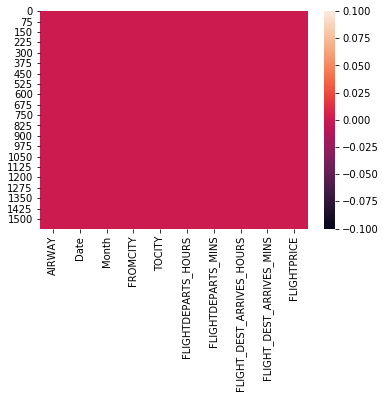

In [22]:
# checking null values using heatmap.
sns.heatmap(df.isnull())

Observation: There are no Null values present in the dataset.

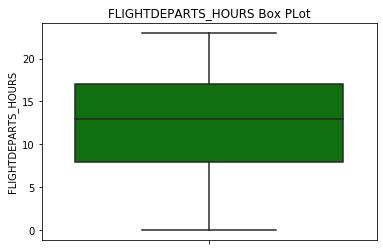

In [23]:
# 1 - BoxPlot of 'FLIGHTDEPARTS_HOURS' column:
plt.title('FLIGHTDEPARTS_HOURS Box PLot')
sns.boxplot(df['FLIGHTDEPARTS_HOURS'],color='green',orient='v')

Observation: There are no Outliers in FLIGHTDEPARTS_HOURS column.

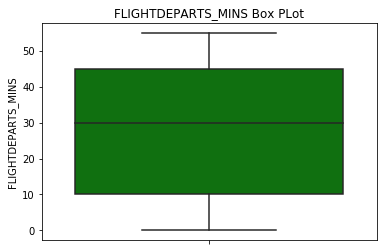

In [24]:
# 2 - BoxPlot of 'FLIGHTDEPARTS_MINS' column:
plt.title('FLIGHTDEPARTS_MINS Box PLot')
sns.boxplot(df['FLIGHTDEPARTS_MINS'],color='green',orient='v')

Observation: There are no Outliers in FLIGHTDEPARTS_MINS column.

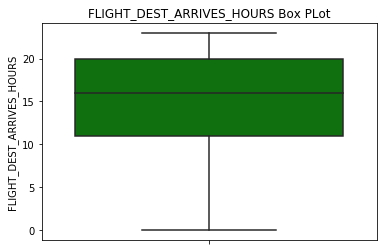

In [25]:
# 3 - BoxPlot of 'FLIGHT_DEST_ARRIVES_HOURS' column:
plt.title('FLIGHT_DEST_ARRIVES_HOURS Box PLot')
sns.boxplot(df['FLIGHT_DEST_ARRIVES_HOURS'],color='green',orient='v')

Observation: There are no Outliers in FLIGHT_DEST_ARRIVES_HOURS column.

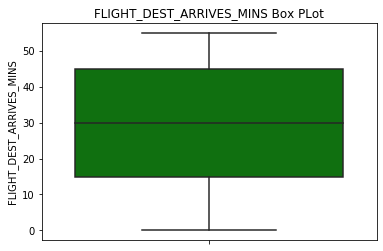

In [26]:
# 4 - BoxPlot of 'FLIGHT_DEST_ARRIVES_MINS' column:
plt.title('FLIGHT_DEST_ARRIVES_MINS Box PLot')
sns.boxplot(df['FLIGHT_DEST_ARRIVES_MINS'],color='green',orient='v')

Observation: There are no Outliers in FLIGHT_DEST_ARRIVES_MINS column.

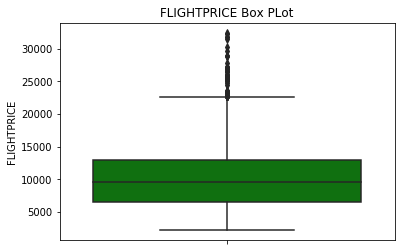

In [27]:
# 5 - BoxPlot of 'FLIGHTPRICE' column:
plt.title('FLIGHTPRICE Box PLot')
sns.boxplot(df['FLIGHTPRICE'],color='green',orient='v')

Observation: There are Outliers present in FLIGHTPRICE column.

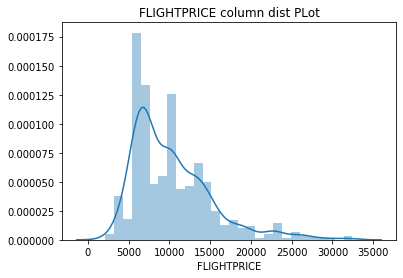

In [28]:
# distplot 1>>>
plt.title('FLIGHTPRICE column dist PLot')
sns.distplot(df['FLIGHTPRICE'])

Observation: FLIGHTPRICE COLUMN IS Right sided skewed.

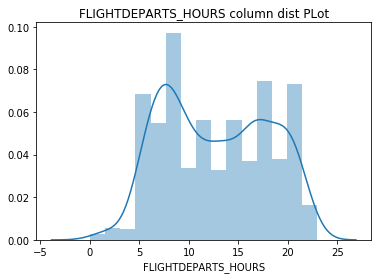

In [29]:
# distplot 2>>>
plt.title('FLIGHTDEPARTS_HOURS column dist PLot')
sns.distplot(df['FLIGHTDEPARTS_HOURS'])

Observation: FLIGHTDEPARTS_HOURS COLUMN Is skewed littlebit on both sides

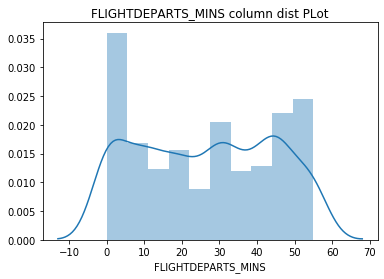

In [30]:
# distplot 3>>>
plt.title('FLIGHTDEPARTS_MINS column dist PLot')
sns.distplot(df['FLIGHTDEPARTS_MINS'])

Observation: FLIGHTDEPARTS_MINS COLUMN Is skewed littlebit on both sides

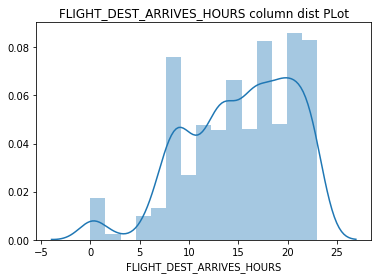

In [31]:
# distplot 4>>>
plt.title('FLIGHT_DEST_ARRIVES_HOURS column dist PLot')
sns.distplot(df['FLIGHT_DEST_ARRIVES_HOURS'])

Observation: FLIGHT_DEST_ARRIVES_HOURS COLUMN Is skewed littlebit on both sides

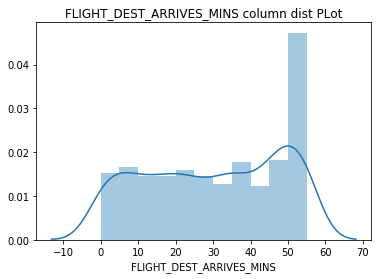

In [32]:
# distplot 5>>>
plt.title('FLIGHT_DEST_ARRIVES_MINS column dist PLot')
sns.distplot(df['FLIGHT_DEST_ARRIVES_MINS'])

Observation: FLIGHT_DEST_ARRIVES_MINS COLUMN Is skewed littlebit on both sides

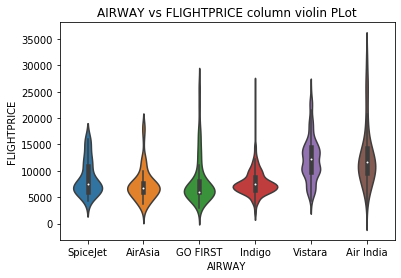

In [33]:
# violinplot of Fuel vs YearsOld column
plt.title('AIRWAY vs FLIGHTPRICE column violin PLot')
ax = sns.violinplot(x="AIRWAY", y="FLIGHTPRICE", data=df)

Observation: from the above violin plot we can easily make out that AirIndia is the most expensive flight, while spicejet is the cheapest flight among all other flights.

Text(0.5, 1, 'AIRWAY vs FLIGHTPRICE column Factor PLot')

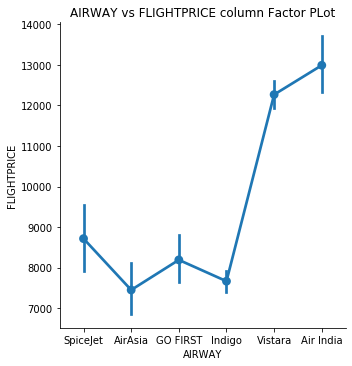

In [34]:
sns.factorplot(x ='AIRWAY', y ='FLIGHTPRICE', data = df)
plt.title('AIRWAY vs FLIGHTPRICE column Factor PLot')

Observation: From the above Factor plot, we can easily make out that Air India is the most expensive flight while Air Asia, Indigo seems to be tbe cheapest flight among all other filghts.

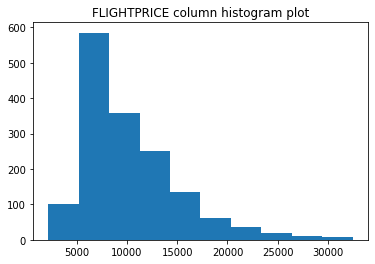

In [35]:
# Creating histogram
fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(df['FLIGHTPRICE'])
plt.title('FLIGHTPRICE column histogram plot')
# Show plot
plt.show()

Observation: From the above histogram plot we can make out that, most of the Flightprices belongs to 5000 to 15000 price range while least flights are above 20000 price range.

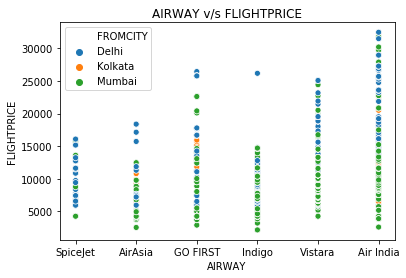

In [36]:
#Scatter Plot - 1.
sns.scatterplot(df['AIRWAY'], df['FLIGHTPRICE'], hue=df['FROMCITY'])
plt.xlabel('AIRWAY')
plt.ylabel('FLIGHTPRICE')
plt.title('AIRWAY v/s FLIGHTPRICE')
plt.show()

Observation: We can see that from the above scatter plot, AirIndia has maximum price range from less that 5000 to 35000 prices, while spicejet has least price range from 5000 to 18000 price range.
    Delhi city has maximum flights and most of the expensive flights are from Delhi only.

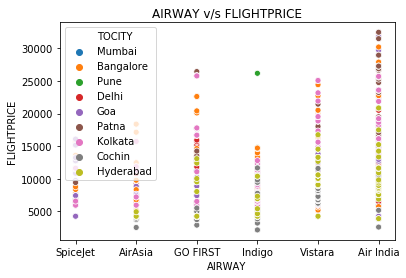

In [37]:
#Scatter Plot - 2.
sns.scatterplot(df['AIRWAY'], df['FLIGHTPRICE'], hue=df['TOCITY'])
plt.xlabel('AIRWAY')
plt.ylabel('FLIGHTPRICE')
plt.title('AIRWAY v/s FLIGHTPRICE')
plt.show()

Observation: From the above scatter plot, we can make out that Air India seems to be having maximum flight price range where as Air Asia and Indigo having least flight price range.

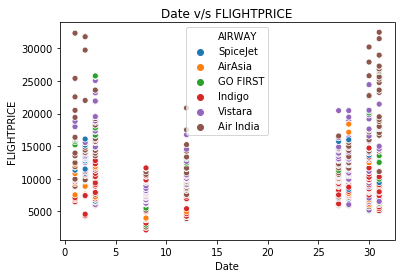

In [38]:
#Scatter Plot - 3.
sns.scatterplot(df['Date'], df['FLIGHTPRICE'], hue=df['AIRWAY'])
plt.xlabel('Date')
plt.ylabel('FLIGHTPRICE')
plt.title('Date v/s FLIGHTPRICE')
plt.show()

Observation: From the above scatter plot we can see that 30th of the month having maximum flight price range while 5th to 10th of the month having least flight price range.

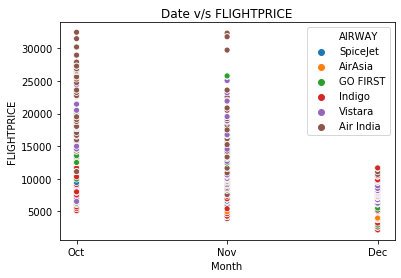

In [39]:
#Scatter Plot - 4.
sns.scatterplot(df['Month'], df['FLIGHTPRICE'], hue=df['AIRWAY'])
plt.xlabel('Month')
plt.ylabel('FLIGHTPRICE')
plt.title('Date v/s FLIGHTPRICE')
plt.show()

Observation: From the above scatter plot, we can make out that As we are checking flight price in october month, we can see that Oct seems to be having maximum flight price range while November less than October and December having least flight price range being in much future in callender.

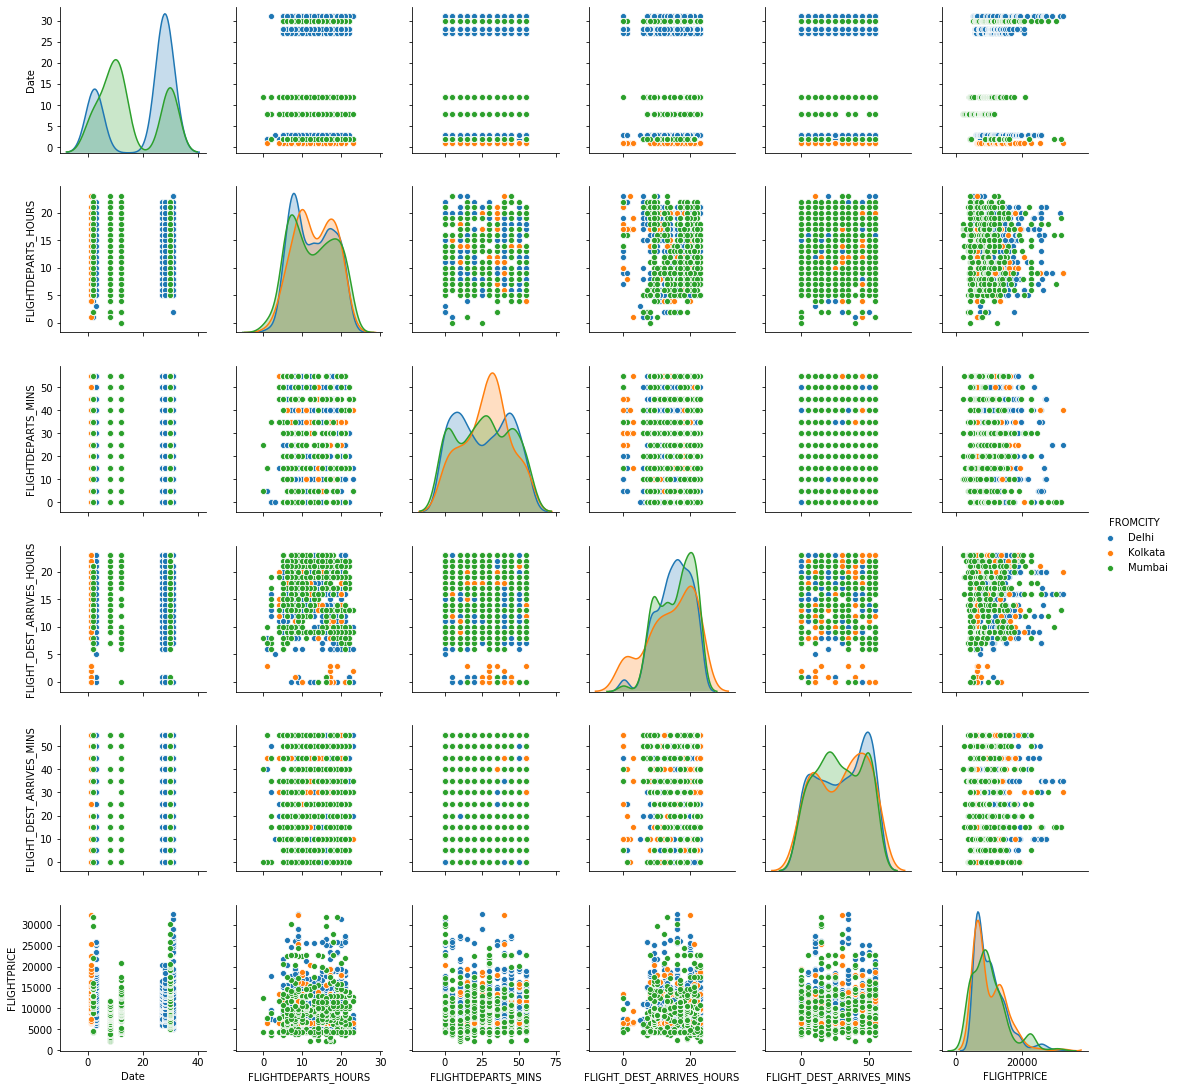

In [40]:
# checking pairplot of the dataset.
sns.pairplot(df, hue = 'FROMCITY')

# LABEL ENCODING THE CATEGORICAL COLUMN:

In [41]:
# Label Encoding the Categorical columns.
LE = LabelEncoder()

In [42]:
df['AIRWAY'] = LE.fit_transform(df['AIRWAY'])

In [43]:
df['Month'] = LE.fit_transform(df['Month'])
df['FROMCITY'] = LE.fit_transform(df['FROMCITY'])
df['TOCITY'] = LE.fit_transform(df['TOCITY'])

# REMOVING OUTLIERS:

In [44]:
#Removing Outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.62774626, 0.80772716, 0.88723253, ..., 1.45082619, 0.25759713,
        0.89565452],
       [0.97827487, 0.80772716, 0.88723253, ..., 0.77412826, 1.36789911,
        0.8954496 ],
       [0.44293449, 0.80772716, 0.88723253, ..., 0.77412826, 1.36789911,
        0.89585944],
       ...,
       [1.51361525, 0.41163019, 0.72685214, ..., 1.08000045, 0.81274812,
        1.46874889],
       [1.51361525, 0.41163019, 0.72685214, ..., 0.58871539, 0.25759713,
        2.15729071],
       [1.51361525, 0.41163019, 0.72685214, ..., 1.08000045, 0.81274812,
        2.15729071]])

In [45]:
threshold = 3
print(np.where(z>3))

(array([ 595,  740,  741,  816,  817,  818,  962,  963,  964, 1164, 1165,
       1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176,
       1177, 1178, 1179, 1317, 1318, 1319, 1320, 1321, 1322, 1323],
      dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int64))


In [46]:
# creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]
df_new

,AIRWAY,Date,Month,FROMCITY,TOCITY,FLIGHTDEPARTS_HOURS,FLIGHTDEPARTS_MINS,FLIGHT_DEST_ARRIVES_HOURS,FLIGHT_DEST_ARRIVES_MINS,FLIGHTPRICE
0,4,27,2,0,6,21,10,23,25,5955
1,1,27,2,0,6,8,50,11,5,5956
2,2,27,2,0,6,9,5,11,5,5954
3,2,27,2,0,6,6,15,8,20,5954
4,2,27,2,0,6,10,55,13,0,5954
...,...,...,...,...,...,...,...,...,...,...
1565,0,12,1,2,4,13,25,21,5,15236
1566,5,12,1,2,4,7,5,17,0,16750
1567,0,12,1,2,4,6,10,21,15,17493
1568,0,12,1,2,4,20,30,12,25,20853


In [47]:
# checking data loss by removing the outliers:
print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

2.038216560509554


OBSERVATION: we can see that after removing outliers from the dataset we are loosing almost 2.03 percent of data, which is very much in range.

# CORRELATION MATRIX:

In [48]:
# checking correlation matrix:
dfcor = df_new.corr()
dfcor

,AIRWAY,Date,Month,FROMCITY,TOCITY,FLIGHTDEPARTS_HOURS,FLIGHTDEPARTS_MINS,FLIGHT_DEST_ARRIVES_HOURS,FLIGHT_DEST_ARRIVES_MINS,FLIGHTPRICE
AIRWAY,1.000000,-0.071798,-0.070388,0.070375,-0.053838,0.075264,0.190565,0.020026,0.156675,0.151555
Date,-0.071798,1.000000,0.861508,-0.242238,0.133085,0.039245,-0.016631,0.074211,-0.107089,-0.010249
Month,-0.070388,0.861508,1.000000,-0.470764,0.221280,0.054829,-0.011961,0.050372,-0.002799,0.091925
FROMCITY,0.070375,-0.242238,-0.470764,1.000000,-0.471855,-0.000502,0.016075,0.035641,-0.035178,-0.018011
TOCITY,-0.053838,0.133085,0.221280,-0.471855,1.000000,-0.016981,-0.023396,0.045340,-0.056789,-0.038607
FLIGHTDEPARTS_HOURS,0.075264,0.039245,0.054829,-0.000502,-0.016981,1.000000,0.152513,-0.049692,0.044394,0.096877
FLIGHTDEPARTS_MINS,0.190565,-0.016631,-0.011961,0.016075,-0.023396,0.152513,1.000000,-0.008156,0.016014,0.065333
FLIGHT_DEST_ARRIVES_HOURS,0.020026,0.074211,0.050372,0.035641,0.045340,-0.049692,-0.008156,1.000000,-0.004201,0.082069
FLIGHT_DEST_ARRIVES_MINS,0.156675,-0.107089,-0.002799,-0.035178,-0.056789,0.044394,0.016014,-0.004201,1.000000,0.138817
FLIGHTPRICE,0.151555,-0.010249,0.091925,-0.018011,-0.038607,0.096877,0.065333,0.082069,0.138817,1.000000


# CHECKING HEATMAP OF CORRELATION MATRIX:

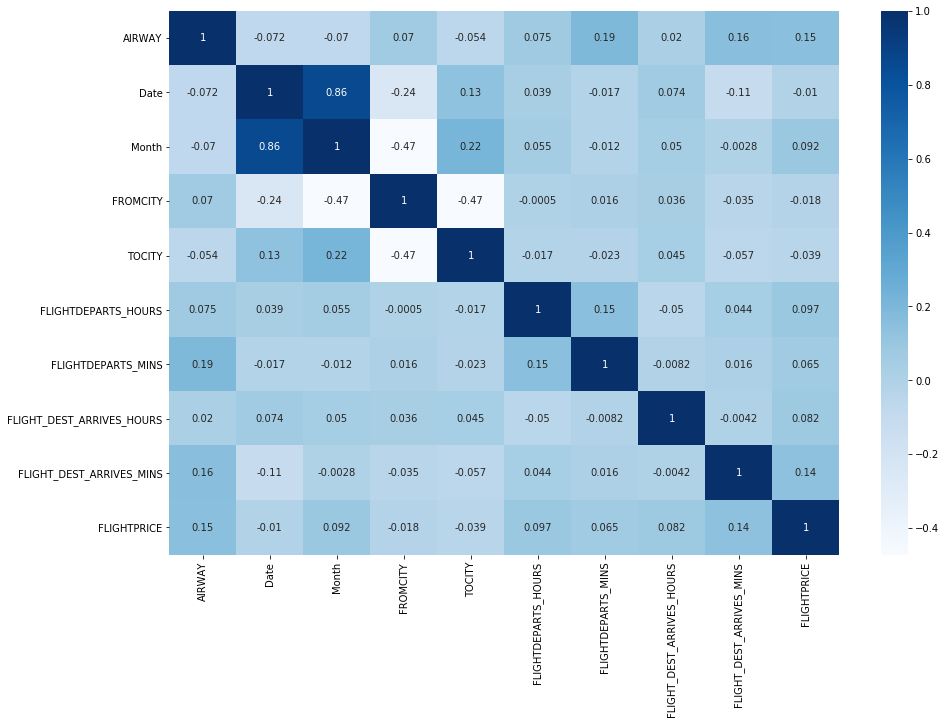

In [49]:
# checking heatmap of correlation matrix:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor, cmap='Blues', annot=True)

Observation: From the above heatmap of correlation matrix, we can make out that, Airway is having highly correlation with the Flight price with 0.15 units while FLIGHT_DEST_ARRIVES_MINS having 0.14 units of correlation. so we can say that Airway and Flight_Dest_Arrives_mins column is having highly correlation with the flight price.

In [51]:
# creating x,y dataset for further model building.
x = df_new.iloc[:,0:9]
y = df_new.iloc[:,-1]

In [52]:
df.columns

Index(['AIRWAY', 'Date', 'Month', 'FROMCITY', 'TOCITY', 'FLIGHTDEPARTS_HOURS',
       'FLIGHTDEPARTS_MINS', 'FLIGHT_DEST_ARRIVES_HOURS',
       'FLIGHT_DEST_ARRIVES_MINS', 'FLIGHTPRICE'],
      dtype='object')

# SCALING THE DATASET:

In [53]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['AIRWAY', 'Date', 'Month', 'FROMCITY', 'TOCITY', 'FLIGHTDEPARTS_HOURS',
       'FLIGHTDEPARTS_MINS', 'FLIGHT_DEST_ARRIVES_HOURS',
       'FLIGHT_DEST_ARRIVES_MINS']
X = pd.DataFrame(x_scaled, columns = columnslist)

In [54]:
X

,AIRWAY,Date,Month,FROMCITY,TOCITY,FLIGHTDEPARTS_HOURS,FLIGHTDEPARTS_MINS,FLIGHT_DEST_ARRIVES_HOURS,FLIGHT_DEST_ARRIVES_MINS
0,0.609741,0.815730,0.890249,-0.771213,1.052523,1.556097,-0.933847,1.443403,-0.260293
1,-1.010849,0.815730,0.890249,-0.771213,1.052523,-0.884107,1.315576,-0.773042,-1.364652
2,-0.470652,0.815730,0.890249,-0.771213,1.052523,-0.696399,-1.215025,-0.773042,-1.364652
3,-0.470652,0.815730,0.890249,-0.771213,1.052523,-1.259523,-0.652669,-1.327153,-0.536382
4,-0.470652,0.815730,0.890249,-0.771213,1.052523,-0.508691,1.596754,-0.403634,-1.640741
...,...,...,...,...,...,...,...,...,...
1533,-1.551046,-0.407706,-0.718685,1.445844,0.235988,0.054433,-0.090313,1.073996,-1.364652
1534,1.149937,-0.407706,-0.718685,1.445844,0.235988,-1.071815,-1.215025,0.335181,-1.640741
1535,-1.551046,-0.407706,-0.718685,1.445844,0.235988,-1.259523,-0.933847,1.073996,-0.812472
1536,-1.551046,-0.407706,-0.718685,1.445844,0.235988,1.368389,0.190865,-0.588338,-0.260293


# Creating Train Test Dataset:

In [55]:
#creating train test dataset from the x and y part inoder to start model making.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1230, 9)
(1230,)
(308, 9)
(308,)


# LINEAR REGRESSION MODEL:

In [56]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [  565.20116353 -1691.10872845  2072.15887056   330.15871059
  -166.00999467   367.85170909    56.62738491   448.92726698
   270.31571252]
linearRegression Intercept 9965.258499593609
linearRegression score 0.09786240436989302


array([11536.96693553, 11198.6002415 ,  9642.73975338, 10928.19914953,
       10198.62078467,  8900.99830771, 11547.84520512,  9932.93113597,
        9747.29697411,  8119.07195305,  9770.92063933,  8738.20073013,
        9960.64704395,  9380.39138464,  9364.51992823, 11402.79766934,
       10797.5918003 , 10687.18848959,  9581.77162633, 10446.70785922,
       10402.62227425, 10728.96456365,  9576.75679695,  9569.37400317,
        5759.57487519,  9979.12277723, 11142.44238611, 11382.40053493,
       10451.98662429, 10789.54728711,  5485.35556147,  9194.52679507,
       10068.9178616 ,  8765.41522041,  6647.36599201, 11706.03367427,
       10798.63865977,  9848.71438523, 11110.13889659,  8369.0771174 ,
       11478.79650459, 10286.78555539, 11310.55546888, 10786.75187757,
       11239.29335979,  9089.65503754,  9884.16345076,  9676.01894887,
        9801.12059343,  8500.50962669,  9216.62579271,  9257.9915902 ,
       10096.4857019 , 10136.19225833, 11416.80813022, 10735.01525683,
      

In [57]:
# calculating errors::
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  3244.258868160091
MEAN SQUARED ERROR:  16814886.007092822
ROOT MEAN SQUARED ERROR:  4100.595811231927


In [58]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.06664082533561544


In [59]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, X, y, cv=cv1).mean())

0.0775490647894849


# LASSO RIDGE REGULARIZATION METHODS:

In [60]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.09786240421163883

In [61]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(ls, X, y, cv=cv1).mean())

0.07810134440984215


In [62]:
rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.09786240410390035

In [63]:
print(cross_val_score(rd, X, y, cv=cv1).mean())

0.081508614422209


# ELASTICNET REGULARIZATION MODEL METHOD:

In [64]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.09777095007716219


array([  561.83806928, -1608.48231387,  1979.07767264,   305.41264497,
        -167.42995047,   366.60542985,    57.5420356 ,   446.43228329,
         276.37407211])

In [65]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  3243.3464636099284
MEAN SQUARED ERROR:  16795313.49319747
ROOT MEAN SQUARED ERROR:  4098.20857121712


In [66]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(enr, X, y, cv=cv1).mean())

0.07119355488572757


# SUPPORT VECTOR REGRESSOR METHOD MODEL:

In [67]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.010852606279547983

kernel : poly
-0.016040629930880845

kernel : rbf
-0.0173528954763289


# RANDOM FOREST REGRESSOR MODEL:

In [68]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_train, y_train))

0.9424526679535343


In [69]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1541.7894942022265
MEAN SQUARED ERROR:  5468128.389939923
ROOT MEAN SQUARED ERROR:  2338.4029571354727


In [70]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

0.6338896102960716


# ADA BOOST REGRESSOR METHOD:

In [71]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
adr_pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.3871436795832942


In [72]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, adr_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, adr_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, adr_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  2706.104778028869
MEAN SQUARED ERROR:  10793401.629246907
ROOT MEAN SQUARED ERROR:  3285.331281506769


In [73]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv= cv1).mean())

0.35651166915632837


# DECISION TREE REGRESSOR MODEL:

In [74]:

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

0.9972664259617916


In [75]:
y_pred = dtr.predict(x_test)
y_pred

array([10680.        ,  7110.        , 10058.        ,  6489.        ,
        4263.        ,  4260.        , 15563.        , 12990.        ,
       11082.        ,  7215.        , 12749.        ,  5955.        ,
        7424.        ,  4262.        ,  4262.        ,  7425.        ,
        4368.        , 10680.        ,  5953.        ,  5954.        ,
       12990.        , 19448.        ,  9420.        ,  7423.        ,
       10547.5       ,  5954.        , 11639.5       ,  5430.        ,
        8306.        , 10654.        ,  9524.        ,  9840.        ,
        7425.        ,  5954.        , 11666.        , 10680.        ,
        6489.        ,  6487.        , 12676.        , 10470.        ,
       15563.        , 12749.        , 13078.        , 12676.        ,
        6489.        ,  7215.        ,  5954.        , 10260.        ,
        5996.        , 12150.        ,  5954.        ,  9988.        ,
        6489.        , 11310.        , 13026.        ,  6488.        ,
      

In [76]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1623.1444805194806
MEAN SQUARED ERROR:  9439028.975018037
ROOT MEAN SQUARED ERROR:  3072.3002742274457


In [77]:
from sklearn.model_selection import cross_val_score
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X, y, cv=cv1).mean())

0.3765482192687145


# FINAL MODEL SELECTION:

Observation: We can see that Ada Boost Regression model is having least overfitting in the model making, we can make out that from the Cross validation score of the model correlation, their difference is least. Thus we can say that Ada Boost Regressor model is out best fit model.

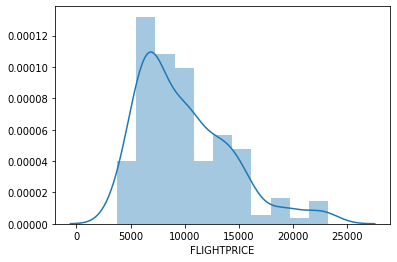

In [78]:
# distplot of original y_test dataset
sns.distplot(y_test)

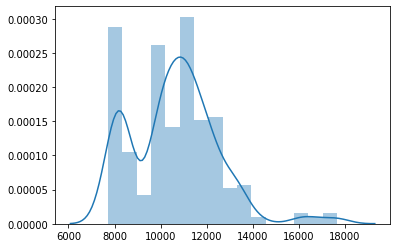

In [79]:
# distplot of predicted y test dataset
sns.distplot(adr_pred)

Observation: we can see that from  the above distplot of adr_pred and y_test datasets that they resemble to some extent though not perfectly.

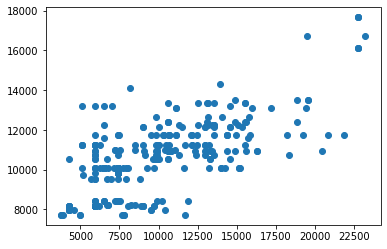

In [80]:
# scatter plot of y_test and predicted y_test dataset
plt.scatter(y_test, adr_pred)

Observation: We can see that from the scatterplot of the y_test and adr_pred values, that their intersection points are linear in nature to some extent.

# SAVING THE MODEL:

In [82]:
import joblib
joblib.dump(adr, 'Vaibhav_Flight_Price_Prediction_project_Model.pkl')

['Vaibhav_Flight_Price_Prediction_project_Model.pkl']

In [83]:
#Reloading the model and predicting the dataset.
FlightPricePrediction_ADR_model = joblib.load('Vaibhav_Flight_Price_Prediction_project_Model.pkl')
FlightPricePrediction_ADR_model.predict(x_train)

array([ 8190.7689769 , 10100.80833333,  7403.22851562, ...,
       11214.39694656, 11239.07373272, 16724.15384615])

# THANK YOU

Name: Vaibhav Tayade

contact details: 8087970061

Email Id: vaibhav_t29@rediffmail.com